In [2]:
# Import pandas 
import pandas as pd 
import os
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt


current_path = os.getcwd()
current_path

'C:\\Users\\owner\\shubham\\projects\\notebooks'

In [3]:
train_dataset = os.path.join(current_path,'facedataset','training.csv')
test_dataset = os.path.join(current_path,'facedataset','test.csv')

# reading csv file  
df = pd.read_csv(train_dataset) 
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [4]:
def string2image(string):
    """Converts a string to a numpy array."""
    return np.array([int(item) for item in string.split()]).reshape((96, 96))

def plot_faces(nrows=5, ncols=5):
    """Randomly displays some faces from the training data."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, ax in zip(image_strings, axes.ravel()):
        ax.imshow(string2image(string), cmap='gray')
        ax.axis('off')

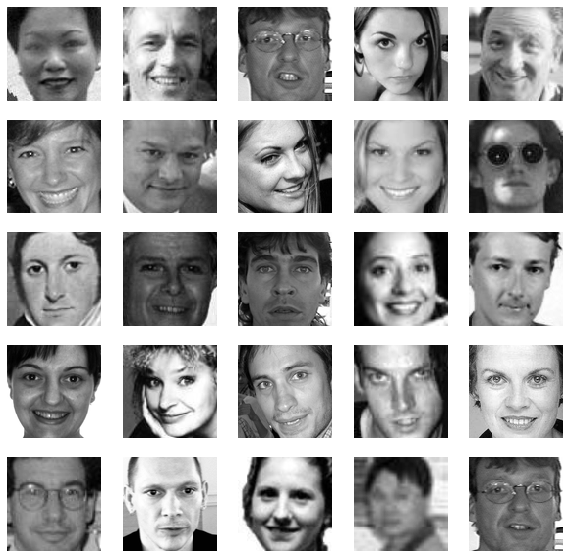

In [5]:
plot_faces()


In [6]:
keypoint_cols = list(df.columns)[:-1]

In [7]:
keypoint_cols


['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [8]:
xy = df.iloc[0][keypoint_cols].values.reshape((15, 2))
xy 

array([[66.0335639098, 39.0022736842],
       [30.2270075188, 36.4216781955],
       [59.582075188000005, 39.647422556399995],
       [73.1303458647, 39.9699969925],
       [36.3565714286, 37.3894015038],
       [23.4528721805, 37.3894015038],
       [56.9532631579, 29.0336481203],
       [80.2271278195, 32.2281383459],
       [40.2276090226, 29.0023218045],
       [16.3563789474, 29.6474706767],
       [44.4205714286, 57.0668030075],
       [61.1953082707, 79.9701654135],
       [28.6144962406, 77.38899248119999],
       [43.3126015038, 72.9354586466],
       [43.1307067669, 84.4857744361]], dtype=object)

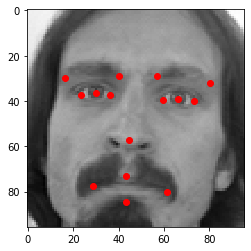

In [9]:
plt.plot(xy[:, 0], xy[:, 1], 'ro')
plt.imshow(string2image(df.iloc[0]['Image']), cmap='gray')

In [10]:
def plot_faces_with_keypoints(nrows=5, ncols=5):
    """Randomly displays some faces from the training data with their keypoints."""
    selection = np.random.choice(df.index, size=(nrows*ncols), replace=False)
    image_strings = df.loc[selection]['Image']
    keypoint_cols = list(df.columns)[:-1]
    keypoints = df.loc[selection][keypoint_cols]
    fig, axes = plt.subplots(figsize=(10, 10), nrows=nrows, ncols=ncols)
    for string, (iloc, keypoint), ax in zip(image_strings, keypoints.iterrows(), axes.ravel()):
        xy = keypoint.values.reshape((15, 2))
        ax.imshow(string2image(string), cmap='gray')
        ax.plot(xy[:, 0], xy[:, 1], 'ro')
        ax.axis('off')

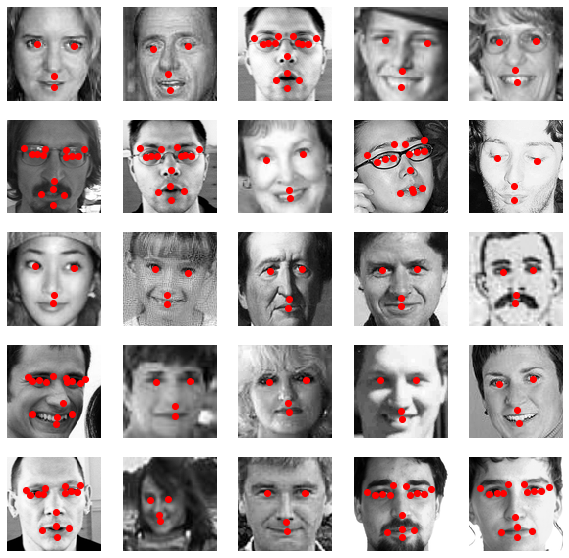

In [11]:
plot_faces_with_keypoints()

In [12]:
fully_annotated = df.dropna()


In [13]:
fully_annotated.shape


(2140, 31)

In [76]:
X = np.stack([string2image(string) for string in fully_annotated['Image']]).astype(np.float)[:, :, :]



In [77]:
y = np.vstack(fully_annotated[fully_annotated.columns[:-1]].values)


In [78]:
X.shape


(2140, 96, 96)

In [79]:
y.shape
print(y[0])
# np.savetxt('y.txt', y, delimiter=',')   # X is an array

[66.03356391 39.00227368 30.22700752 36.4216782  59.58207519 39.64742256
 73.13034586 39.96999699 36.35657143 37.3894015  23.45287218 37.3894015
 56.95326316 29.03364812 80.22712782 32.22813835 40.22760902 29.0023218
 16.35637895 29.64747068 44.42057143 57.06680301 61.19530827 79.97016541
 28.61449624 77.38899248 43.3126015  72.93545865 43.13070677 84.48577444]


In [80]:
X_train = X / 255


In [81]:

# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import MinMaxScaler

# output_pipe = make_pipeline(
#     MinMaxScaler(feature_range=(-1, 1))
# )

# Y = output_pipe.fit_transform(y)

def transform_y(min,max,X):
    print(X.min(axis=0))
    print(X.max(axis=0))
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min
    return X_scaled
y = transform_y(-1,1,y)
y

[47.83575706 23.83299623 18.92261063 24.7730717  41.77938067 27.19009811
 52.94714408 26.25002264 24.11262373 26.25002264 11.05458893 26.52163265
 35.58173342 15.85936056 55.54992895 10.52232453 25.0603266  16.476
  3.82624306 13.22445283 24.47258951 41.5584     43.86947971 57.02325806
  9.778137   56.69020819 32.26031197 56.71904263 33.04760474 57.23229576]
[78.01308179 46.13242105 42.49517173 45.98098113 69.0230303  47.19031579
 87.0322516  49.65382488 47.29374648 44.88730097 40.05097063 50.00211321
 67.752      40.29340845 94.26995745 48.82342502 51.30057143 39.44585915
 39.67608163 44.85796226 65.27965368 75.99273134 84.76712315 94.67363736
 50.97334818 93.44317642 61.80450618 93.91633776 62.43809524 95.80898312]


array([[ 0.20605832,  0.36050841, -0.04088513, ..., -0.12808628,
        -0.31385276,  0.4129507 ],
       [ 0.09334934, -0.00113295, -0.06444905, ..., -0.27158625,
        -0.15480756,  0.46450493],
       [ 0.14134011, -0.00655322,  0.01653603, ..., -0.2756061 ,
        -0.03184041,  0.11088194],
       ...,
       [ 0.36493936,  0.32909068, -0.15382581, ...,  0.20030702,
        -0.03852343,  0.67522039],
       [ 0.08136972, -0.38486345, -0.31460249, ...,  0.21419506,
         0.73957498,  0.19881974],
       [ 0.2491497 , -0.04477964,  0.00641412, ...,  0.03472845,
         0.35253044,  0.31834886]])

In [65]:
train_image = X[:2001]
test_image = X[2001:]

train_image = train_image/255
test_image = test_image/255
print(train_image.shape)
print(test_image.shape)
print(train_image[1])


(2001, 96, 96)
(139, 96, 96)
[[0.85882353 0.84313725 0.8        ... 0.36078431 0.34509804 0.32941176]
 [0.87058824 0.85882353 0.8627451  ... 0.36078431 0.34509804 0.3372549 ]
 [0.90588235 0.87843137 0.83137255 ... 0.30196078 0.31372549 0.32941176]
 ...
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]
 [0.00392157 0.00392157 0.00392157 ... 0.00392157 0.00392157 0.00392157]]


In [66]:
# train_label = Y[:2001]
# test_label = Y[2001:]
train_label = y[:2001]
test_label = y[2001:]

print(train_label.shape)
print(test_label.shape)
train_label[1]

(2001, 30)
(139, 30)


array([ 0.09334934, -0.00113295, -0.06444905, -0.18184834,  0.2536345 ,
       -0.19158372,  0.04301149, -0.1508095 ,  0.02860416, -0.12953929,
       -0.07451062, -0.43588804,  0.14426598,  0.01633495,  0.19236915,
        0.0382782 ,  0.34667375, -0.15802335, -0.2725703 , -0.12533216,
        0.16321568, -0.18090257, -0.38617651,  0.02674886,  0.23044622,
        0.05338166, -0.02354529, -0.27158625, -0.15480756,  0.46450493])

In [67]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras


print(tf.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [68]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3,3), padding='same', activation='relu', input_shape=(96,96,1)),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(30, activation=tf.nn.softmax)
])

In [69]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['accuracy'])

In [70]:
X_train.shape
X_train.shape


(2140, 96, 96)

In [71]:

model.fit(train_image.reshape(2001,96,96,1), train_label, epochs=20, batch_size=50)


Epoch 1/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0782 - acc: 0.1409
Epoch 2/20
2001/2001 [==============================] - 3s 2ms/sample - loss: 0.0597 - acc: 0.1879
Epoch 3/20
2001/2001 [==============================] - 3s 2ms/sample - loss: 0.0562 - acc: 0.3533
Epoch 4/20
2001/2001 [==============================] - 3s 2ms/sample - loss: 0.0543 - acc: 0.4078
Epoch 5/20
2001/2001 [==============================] - 3s 2ms/sample - loss: 0.0531 - acc: 0.4938
Epoch 6/20
2001/2001 [==============================] - 3s 2ms/sample - loss: 0.0526 - acc: 0.5112
Epoch 7/20
2001/2001 [==============================] - 3s 2ms/sample - loss: 0.0521 - acc: 0.5262
Epoch 8/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0517 - acc: 0.5717
Epoch 9/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0515 - acc: 0.5762
Epoch 10/20
2001/2001 [==============================] - 4s 2ms/sample - loss: 0.0513 - acc: 0.5752
Epoch 11/

In [72]:
test_loss, test_acc = model.evaluate(test_image.reshape(139,96,96,1), test_label)

print('Test accuracy:', test_acc)

139/139 [==============================] - 0s 777us/sample - loss: 0.0713 - acc: 0.2662
Test accuracy: 0.26618704


In [88]:
img = train_image[0]
img = np.reshape(img, [1,96, 96,1])
predictions = model.predict(img)

predictions

array([[5.60022071e-02, 1.99566469e-01, 1.22385217e-07, 2.16923877e-06,
        1.60813838e-01, 2.56934291e-05, 3.20210941e-02, 2.66618827e-07,
        4.49286017e-06, 3.87156308e-02, 2.50510936e-08, 7.36867605e-07,
        9.21716094e-02, 1.86399775e-05, 1.19690105e-01, 6.50281180e-08,
        3.42405457e-07, 9.15249359e-07, 7.42031361e-08, 3.90862937e-07,
        1.16198452e-03, 3.74931339e-08, 2.06497191e-07, 3.08512313e-07,
        2.36881431e-03, 6.23762048e-07, 5.86169165e-07, 4.36993446e-08,
        3.21918989e-08, 2.97432303e-01]], dtype=float32)

In [89]:
from numpy import genfromtxt
y_arr = genfromtxt('y.txt', delimiter=',')

def inverse_transform_y(min,max,X,y_trans):
    y_trans = y_trans - min
    y_trans = (y_trans)/(max-min)
    y_trans = y_trans * (  X.max(axis=0) - X.min(axis=0))
    y_trans = y_trans + X.min(axis=0)
    return y_trans

      
predictions = inverse_transform_y(-1,1,y_arr,predictions)
predictions = predictions.reshape(15,2)
predictions

array([[63.76941861, 37.20781754],
       [30.70889258, 35.37704917],
       [57.59178301, 37.19046445],
       [70.53541823, 37.95192655],
       [35.70323761, 35.92943852],
       [25.55277978, 38.26188133],
       [53.14946029, 28.0766117 ],
       [77.22714448, 29.67287706],
       [38.18045371, 27.96094053],
       [21.75116448, 29.0412132 ],
       [44.89982913, 58.77556567],
       [64.31830631, 75.84845444],
       [30.42453435, 75.06670326],
       [47.03241788, 75.3176902 ],
       [47.74284999, 82.25761593]])

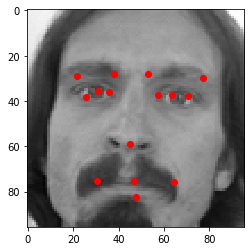

In [90]:
plt.imshow(train_image[0], cmap='gray')
plt.plot(predictions[:, 0], predictions[:, 1], 'ro')

In [91]:
import numpy as np
import cv2 as cv
from PIL import Image
import imutils

face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


In [86]:
img_ori = cv.imread('test_face.jpg')
gray = cv.cvtColor(img_ori, cv.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    just_face_img = cv.resize(gray[y:y+h,x:x+w], (96,96))
    cv.rectangle(img_ori,(x,y),(x+w,y+h),(255,0,0),1)
    print(just_face.size)
    print(just_face.shape)
    just_face = np.reshape(just_face_img, [1,96, 96,1])
    predictions = model.predict(just_face)

predictions

NameError: name 'just_face' is not defined

In [ ]:
predictions = output_pipe.inverse_transform(predictions).reshape(15, 2)
predictions.shape

In [ ]:
plt.imshow(just_face_img, cmap='gray')
plt.plot(predictions[:, 0], predictions[:, 1], 'ro')

In [216]:
model.save('facial_points.h5')